<a href="https://colab.research.google.com/github/brunoscog/Alura_One_Data_Science_Challenge_2/blob/main/Challege_2_TelecomX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Challenge Telecom X: análise de evasão de clientes**

**Descrição**
Você foi contratado como assistente de análise de dados na Telecom X e fará parte do projeto "Churn de Clientes". A empresa enfrenta um alto índice de cancelamentos e precisa entender os fatores que levam à perda de clientes.

Seu desafio será coletar, tratar e analisar os dados, utilizando Python e suas principais bibliotecas para extrair insights valiosos. A partir da sua análise, os demais colegas da  equipe de Data Science poderá avançar para modelos preditivos e desenvolver estratégias para reduzir a evasão.

####**O que você vai praticar:**
* Importar e manipular dados de uma API de forma eficiente.
* Aplicar os conceitos de ETL (Extração, Transformação e Carga) na preparação dos dados.
* Criar visualizações de dados estratégicas para identificar padrões e tendências.
* Realizar uma Análise Exploratória de Dados (EDA) e gerar um relatório com insights relevantes.

Agora é sua vez! 🚀

Use seus conhecimentos para transformar dados brutos em informações estratégicas e ajudar a Telecom X a reter mais clientes.

 ## **Extração**

###**Extração dos Dados**

**Descrição**
Para iniciar sua análise, você precisará importar os dados da API da Telecom X. Esses dados estão disponíveis no formato JSON e contêm informações essenciais sobre os clientes, incluindo dados demográficos, tipo de serviço contratado e status de evasão.

📌 Link da API:

* https://github.com/ingridcristh/challenge2-data-science/blob/main/TelecomX_Data.json
* https://github.com/ingridcristh/challenge2-data-science/tree/main



**O que você deve fazer:**
* Carregar os dados diretamente da API utilizando Python.
* Converter os dados para um DataFrame do Pandas para facilitar a manipulação.

Este é o primeiro passo para transformar os dados brutos em insights valiosos.

Bora codar? 🚀

In [1]:
import pandas as pd
import numpy as np
import requests
import json

In [2]:
dados = pd.read_json('https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_Data.json')

In [3]:
dados.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [4]:
pd.json_normalize(dados['customer'])

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3
...,...,...,...,...,...
7262,Female,0,No,No,13
7263,Male,0,Yes,No,22
7264,Male,0,No,No,2
7265,Male,0,Yes,Yes,67


In [5]:
cols_para_normalizar = ['customer', 'phone', 'internet', 'account']
dados_raw = dados.copy()

for col in cols_para_normalizar:
    coluna_normalizada = pd.json_normalize(dados[col]).add_prefix(f'{col}_')
    dados = pd.concat([dados.drop(columns=[col]), coluna_normalizada], axis=1)

dados


,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


## **Transformação**

###**Conhecendo o Dataset**

**Descrição**
Agora que você extraiu os dados, é fundamental entender a estrutura do dataset e o significado de suas colunas. Essa etapa ajudará a identificar quais variáveis são mais relevantes para a análise de evasão de clientes.

> Para te auxiliar nesse processo, criamos um dicionário de dados com a descrição de cada coluna. Embora não seja obrigatório utilizá-lo, ele pode facilitar a compreensão das informações disponíveis.

* https://github.com/alura-cursos/challenge2-data-science/blob/main/TelecomX_dicionario.md

**O que você deve fazer:**
* Explorar as colunas do dataset e verificar seus tipos de dados.
* Consultar o dicionário para entender melhor os significados das variáveis.
* Identificar as colunas mais relevantes para a análise de evasão.

Dicas:
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dtypes.html

####**Dicionário de dados**

* `customerID`: número de identificação único de cada cliente
* `Churn`: se o cliente deixou ou não a empresa
* `gender`: gênero (masculino e feminino)
* `SeniorCitizen`: informação sobre um cliente ter ou não idade igual ou maior que 65 anos
* `Partner`:  se o cliente possui ou não um parceiro ou parceira
* `Dependents`: se o cliente possui ou não dependentes
* `tenure`:  meses de contrato do cliente
* `PhoneService`: assinatura de serviço telefônico
* `MultipleLines`: assisnatura de mais de uma linha de telefone
* `InternetService`: assinatura de um provedor internet
* `OnlineSecurity`: assinatura adicional de segurança online
* `OnlineBackup`: assinatura adicional de backup online
* `DeviceProtection`: assinatura adicional de proteção no dispositivo
* `TechSupport`: assinatura adicional de suporte técnico, menos tempo de espera
* `StreamingTV`: assinatura de TV a cabo
* `StreamingMovies`: assinatura de streaming de filmes
* `Contract`: tipo de contrato
* `PaperlessBilling`: se o cliente prefere receber online a fatura
* `PaymentMethod`: forma de pagamento
* `Charges.Monthly`: total de todos os serviços do cliente por mês
* `Charges.Total`: total gasto pelo cliente

In [6]:
dados.shape

(7267, 21)

In [7]:
dados.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [8]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

In [9]:
dados.dtypes

,0
customerID,object
Churn,object
customer_gender,object
customer_SeniorCitizen,int64
customer_Partner,object
customer_Dependents,object
customer_tenure,int64
phone_PhoneService,object
phone_MultipleLines,object
internet_InternetService,object


###**Verificando Inconsistências nos Dados**

**Descrição**
Neste passo, verifique se há problemas nos dados que possam afetar a análise. Fique atento a valores ausentes, duplicados, erros de formatação e inconsistências nas categorias. Esse processo é essencial para garantir que os dados estejam prontos para as próximas etapas.

Dicas:
* https://pandas.pydata.org/docs/reference/api/pandas.unique.html
* https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.normalize.html

In [10]:
# Verifica valores ausentes
dados.isnull().sum()

,0
customerID,0
Churn,0
customer_gender,0
customer_SeniorCitizen,0
customer_Partner,0
customer_Dependents,0
customer_tenure,0
phone_PhoneService,0
phone_MultipleLines,0
internet_InternetService,0


In [11]:
# Verifica valores que são strings vazias, que pandas não reconhece como NaN por padrão
(dados == ' ').sum()

,0
customerID,0
Churn,0
customer_gender,0
customer_SeniorCitizen,0
customer_Partner,0
customer_Dependents,0
customer_tenure,0
phone_PhoneService,0
phone_MultipleLines,0
internet_InternetService,0


In [12]:
# Ver os 10 primeiros valores únicos da coluna com tipo suspeito
dados['account_Charges.Total'].unique()[:10]

array(['593.3', '542.4', '280.85', '1237.85', '267.4', '571.45',
       '7904.25', '5377.8', '340.35', '5957.9'], dtype=object)

###**Tratando as Inconsistências**

**Descrição**

Agora, com as inconsistências identificadas, é hora de aplicar as correções necessárias. Ajuste os dados para garantir que estejam completos e coerentes, preparando-os para as próximas etapas da análise.

Dicas:
* https://www.alura.com.br/artigos/manipulacao-de-strings-no-pandas-lower-replace-startswith-e-contains?srsltid=AfmBOopqX9iYVnQz6jaAsWT4huN7NHhCD0rjQxArhCtsQRc9DjBalHwM

In [13]:
# Substitui espaços vazios por NaN
dados['account_Charges.Total'] = dados['account_Charges.Total'].replace(' ', np.nan)

In [14]:
# Converte para float
dados['account_Charges.Total'] = dados['account_Charges.Total'].astype(np.float64)

In [15]:
# Verifica novamente o tipo e valores ausentes
print(dados['account_Charges.Total'].dtype)
print(dados['account_Charges.Total'].isnull().sum())

float64
11


In [16]:
dados['account_Charges.Total'].isnull().sum()

np.int64(11)

In [17]:
# Remove linhas com valores ausentes
dados = dados.dropna(subset=['account_Charges.Total']).reset_index(drop=True)

dados['account_Charges.Total'].isnull().sum()

np.int64(0)

###**Coluna de Contas Diárias**

**Descrição**

Agora, com os dados limpos, é hora de criar a coluna "Contas_Diarias". Utilize o faturamento mensal para calcular o valor diário, proporcionando uma visão mais detalhada do comportamento dos clientes ao longo do tempo.

**Essa coluna ajudará a aprofundar sua análise e fornecer informações valiosas para as próximas etapas.**

In [18]:
# Cria coluna de contas diárias, considerando 30 dias por mês
dados['account_Charges.Daily'] = dados.apply(
    lambda row: row['account_Charges.Total'] / (row['customer_tenure'] * 30)
    if row['customer_tenure'] > 0 else 0,
    axis=1
)


In [19]:
dados.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total,account_Charges.Daily
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.197407
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,2.008889
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.340417
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.173974
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.971111


###**Padronização e Transformação de Dados (Opcional)**

**Descrição**

A padronização e transformação de dados é uma etapa opcional, mas altamente recomendada, pois visa tornar as informações mais consistentes, compreensíveis e adequadas para análise. Durante essa fase, você pode, por exemplo, converter valores textuais como "Sim" e "Não" em valores binários (1 e 0), facilitando o processamento matemático e a aplicação de modelos analíticos.

Além disso, traduzir ou renomear colunas e dados torna os dados mais acessíveis e compreensíveis, especialmente quando se lida com fontes externas ou termos técnicos. Embora não seja obrigatória, essa etapa pode melhorar significativamente a clareza e a comunicação dos resultados, facilitando a interpretação e evitando confusões, especialmente ao compartilhar informações com stakeholders não técnicos.

####**Transformação de colunas booleanas em biárias**

In [20]:
colunas_binarias = [col for col in dados.columns if set(dados[col].unique()) <= {'Yes', 'No'}]
colunas_binarias

['customer_Partner',
 'customer_Dependents',
 'phone_PhoneService',
 'account_PaperlessBilling']

In [21]:
# Converte Yes/No para 1/0
for col in colunas_binarias:
    dados[col] = dados[col].map({'Yes': 1, 'No': 0})

In [22]:
# Ver os valores únicos em colunas suspeitas
colunas_suspeitas = [
    'phone_MultipleLines', 'internet_OnlineSecurity', 'internet_OnlineBackup',
    'internet_DeviceProtection', 'internet_TechSupport',
    'internet_StreamingTV', 'internet_StreamingMovies'
]

for col in colunas_suspeitas:
    print(f"\n{col}: {dados[col].unique()}")



phone_MultipleLines: ['No' 'Yes' 'No phone service']

internet_OnlineSecurity: ['No' 'Yes' 'No internet service']

internet_OnlineBackup: ['Yes' 'No' 'No internet service']

internet_DeviceProtection: ['No' 'Yes' 'No internet service']

internet_TechSupport: ['Yes' 'No' 'No internet service']

internet_StreamingTV: ['Yes' 'No' 'No internet service']

internet_StreamingMovies: ['No' 'Yes' 'No internet service']


In [23]:
# Transformando tudo em binário
mapeamento_simples = {'Yes': 1, 'No': 0, 'No internet service': 0, 'No phone service': 0}

for col in colunas_suspeitas:
    dados[col] = dados[col].map(mapeamento_simples)

In [24]:
dados.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total,account_Charges.Daily
0,0002-ORFBO,No,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.197407
1,0003-MKNFE,No,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,2.008889
2,0004-TLHLJ,Yes,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.340417
3,0011-IGKFF,Yes,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.173974
4,0013-EXCHZ,Yes,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.971111


####**Transformação das colunas categóricas**

In [25]:
colunas_categoricas = [
    'customer_gender',
    'internet_InternetService',
    'account_Contract',
    'account_PaymentMethod'
]

In [26]:
for col in colunas_categoricas:
    dados[col] = dados[col].astype('category')
dados.dtypes

,0
customerID,object
Churn,object
customer_gender,category
customer_SeniorCitizen,int64
customer_Partner,int64
customer_Dependents,int64
customer_tenure,int64
phone_PhoneService,int64
phone_MultipleLines,int64
internet_InternetService,category


## **Carga e análise**

###**Análise Descritiva**

Para começar, realize uma análise descritiva dos dados, calculando métricas como média, mediana, desvio padrão, e outras medidas que ajudem a entender melhor a distribuição e comportamento dos clientes.

Dicas:
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html

In [27]:
# Análise descritiva das variáveis numéricas
dados.describe()

,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_PaperlessBilling,account_Charges.Monthly,account_Charges.Total,account_Charges.Daily
count,7256.0000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000
mean,0.1629,0.483600,0.299063,32.395535,0.902839,0.421858,0.285832,0.344542,0.342751,0.289416,0.383958,0.387955,0.593716,64.755423,2280.634213,2.158564
std,0.3693,0.499765,0.457879,24.558067,0.296197,0.493890,0.451841,0.475252,0.474662,0.453522,0.486381,0.487318,0.491173,30.125739,2268.632997,1.007442
min,0.0000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.459167
25%,0.0000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.450000,400.225000,1.191667
50%,0.0000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.300000,1391.000000,2.341667
75%,0.0000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.900000,3785.300000,3.005985
max,1.0000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,4.046667


In [28]:
# Mediana
dados.median(numeric_only=True)

,0
customer_SeniorCitizen,0.000000
customer_Partner,0.000000
customer_Dependents,0.000000
customer_tenure,29.000000
phone_PhoneService,1.000000
phone_MultipleLines,0.000000
internet_OnlineSecurity,0.000000
internet_OnlineBackup,0.000000
internet_DeviceProtection,0.000000
internet_TechSupport,0.000000


###**Distribuição da Evasão**

**Descrição**

Neste passo, o objetivo é entender como a variável "churn" (evasão) está distribuída entre os clientes. Utilize gráficos para visualizar a proporção de clientes que permaneceram e os que saíram.

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

cores_padrao = ['midnightblue', '#A9A9A9']

####**Gráfico de Distribuição de Evasão**

<ipython-input-30-8990293>:2: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x='Churn', data=dados, hue='Churn', palette=cores_padrao)


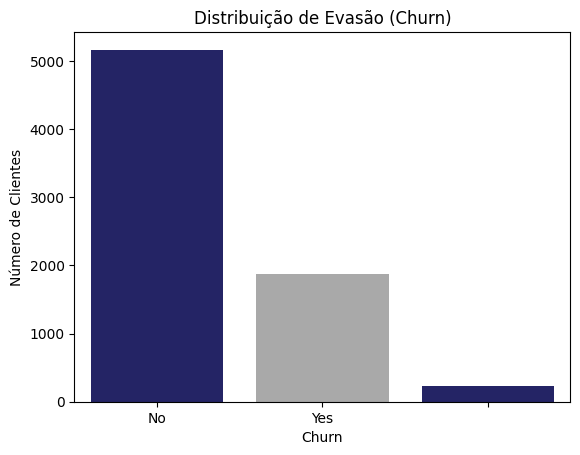

In [30]:
# Contagem de churn
sns.countplot(x='Churn', data=dados, hue='Churn', palette=cores_padrao)
plt.title('Distribuição de Evasão (Churn)')
plt.xlabel('Churn')
plt.ylabel('Número de Clientes')
plt.show()

In [31]:
dados['Churn'].value_counts(dropna=False)

,count
Churn,
No,5163
Yes,1869
,224


In [32]:
import numpy as np

In [58]:
# Tratando os dados vazios
dados['Churn'] = dados['Churn'].replace('', np.nan)
dados = dados.dropna(subset=['Churn']).reset_index(drop=True)

dados['Churn'].value_counts()

,count
Churn,
No,5163
Yes,1869


####**Gráfico Distribuição de Evasão (Churn)**

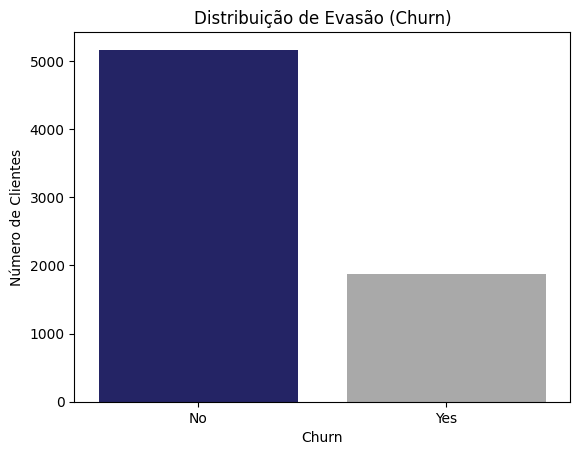

In [35]:
# Contagem de churn
sns.countplot(x='Churn', data=dados, hue='Churn', palette=cores_padrao)
plt.title('Distribuição de Evasão (Churn)')
plt.xlabel('Churn')
plt.ylabel('Número de Clientes')
plt.show()

###**Contagem de Evasão por Variáveis Categóricas**

**Descrição**

Agora, vamos explorar como a evasão se distribui de acordo com variáveis categóricas, como gênero, tipo de contrato, método de pagamento, entre outras.

Essa análise pode revelar padrões interessantes, como, por exemplo, se clientes de determinados perfis têm maior tendência a cancelar o serviço, o que ajudará a direcionar ações estratégicas.

####**Gráfico de Evasão por Gênero**

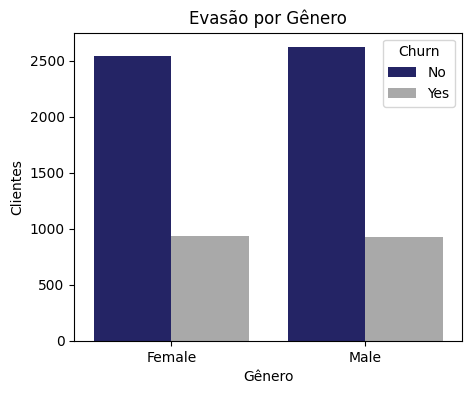

In [36]:
dados['Evasao'] = dados['Churn'].map({'Yes': 'Sim', 'No': 'Não'})
plt.figure(figsize=(5, 4))
sns.countplot(x='customer_gender', hue='Churn', data=dados, palette=cores_padrao)
plt.title('Evasão por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Clientes')
plt.show()

####**Gráfico de Evasão por Tipo de Contrato**

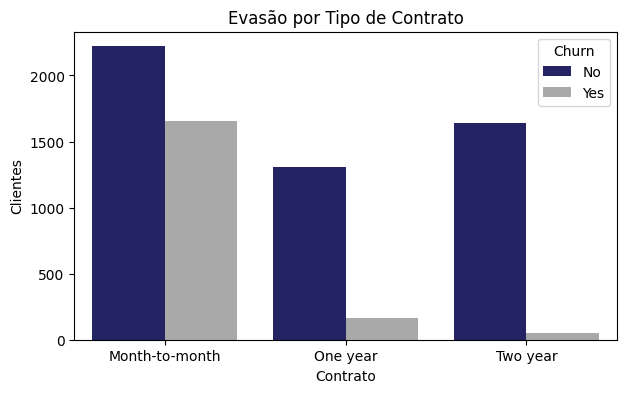

In [37]:
plt.figure(figsize=(7, 4))
sns.countplot(x='account_Contract', hue='Churn', data=dados, palette=cores_padrao)
plt.title('Evasão por Tipo de Contrato')
plt.xlabel('Contrato')
plt.ylabel('Clientes')

plt.show()

####**Gráfico de Evasão por Forma de Pagamento**

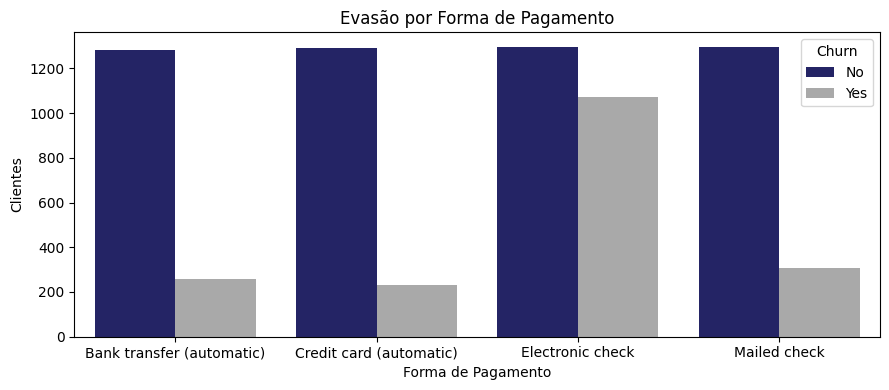

In [38]:
plt.figure(figsize=(9, 4))
sns.countplot(x='account_PaymentMethod', hue='Churn', data=dados, palette=cores_padrao)
plt.title('Evasão por Forma de Pagamento')
plt.xlabel('Forma de Pagamento')
plt.ylabel('Clientes')


plt.tight_layout()
plt.show()

###**Contagem de Evasão por Variáveis Numéricas**

**Descrição**

Neste passo, explore como variáveis numéricas, como "total gasto" ou "tempo de contrato", se distribuem entre clientes que cancelaram (evasão) e os que não cancelaram.

Essa análise ajuda a entender se certos valores numéricos estão mais associados à evasão, oferecendo insights sobre os fatores que influenciam o comportamento dos clientes.

####**Gráficos de Evasão por Variáveis Numéricas (Boxplots)**

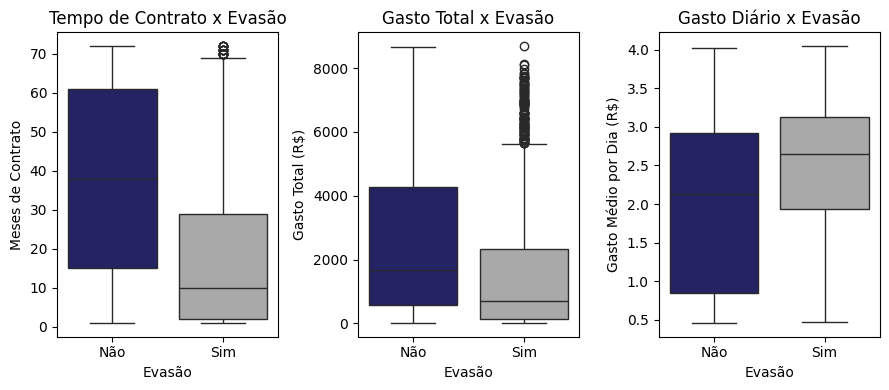

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Definindo a paleta de cores (se ainda não estiver definida em uma célula anterior)
cores_padrao = ['midnightblue', '#A9A9A9'] # midnightblue para 'Não' e cinza para 'Sim'

plt.figure(figsize=(9, 4)) # Mantendo o tamanho original do seu código

# 1. Evasão x Tenure
plt.subplot(1, 3, 1)
sns.boxplot(x='Evasao', y='customer_tenure', data=dados, hue='Evasao', palette=cores_padrao, legend=False) # Adicionado hue e legend=False
plt.title('Tempo de Contrato x Evasão')
plt.xlabel('Evasão')
plt.ylabel('Meses de Contrato')

# 2. Evasão x Total Gasto
plt.subplot(1, 3, 2)
sns.boxplot(x='Evasao', y='account_Charges.Total', data=dados, hue='Evasao', palette=cores_padrao, legend=False) # Adicionado hue e legend=False
plt.title('Gasto Total x Evasão')
plt.xlabel('Evasão')
plt.ylabel('Gasto Total (R$)')

# 3. Evasão x Gasto Diário
plt.subplot(1, 3, 3)
sns.boxplot(x='Evasao', y='account_Charges.Daily', data=dados, hue='Evasao', palette=cores_padrao, legend=False) # Adicionado hue e legend=False
plt.title('Gasto Diário x Evasão')
plt.xlabel('Evasão')
plt.ylabel('Gasto Médio por Dia (R$)')

plt.tight_layout()
plt.show()

**Descrição**

Finalize o desafio elaborando um relatório dentro do próprio notebook que resuma todo o trabalho realizado. O relatório deve incluir:

* Introdução: Explique o objetivo da análise e o problema de evasão de clientes (Churn).

* Limpeza e Tratamento de Dados: Descreva os passos realizados para importar, limpar e tratar os dados.

* Análise Exploratória de Dados: Apresente as análises feitas, incluindo gráficos e visualizações para identificar padrões.

* Conclusões e Insights: Resuma os principais achados e como esses dados podem ajudar a reduzir a evasão.

* Recomendações: Ofereça sugestões baseadas na sua análise.

Certifique-se de que o relatório esteja bem estruturado, claro e com as visualizações que sustentam suas conclusões.

##**Extra**

###**Análise de Correlação entre Variáveis**

**Descrição**

Esta atividade é um extra, logo é OPCIONAL.

Como um passo adicional, você pode explorar a correlação entre diferentes variáveis do dataset. Isso pode ajudar a identificar quais fatores têm maior relação com a evasão de clientes, como:

A relação entre a conta diária e a evasão.

Como a quantidade de serviços contratados afeta a probabilidade de churn.

Você pode usar a função corr() do Pandas para calcular as correlações e visualizar com gráficos de dispersão ou matrizes de correlação. Essa análise adicional pode fornecer insights valiosos para a criação de modelos preditivos mais robustos.

In [40]:
# Mapear 'Yes' para 1 e 'No' para 0 na coluna 'Churn'
dados['Churn_numeric'] = dados['Churn'].map({'Yes': 1, 'No': 0})

# Verificar os primeiros valores da nova coluna
print(dados[['Churn', 'Churn_numeric']].head())

  Churn  Churn_numeric
0    No              0
1    No              0
2   Yes              1
3   Yes              1
4   Yes              1


####**Heatmap da Matriz de Correlação**

In [41]:
# Calcular a matriz de correlação, incluindo apenas colunas numéricas
correlation_matrix = dados.corr(numeric_only=True)

# Exibir a matriz de correlação (primeiras 5 linhas e a correlação com 'Churn_numeric')
print("\nMatriz de Correlação (primeiras 5 linhas e coluna Churn_numeric):\n")
print(correlation_matrix.head())
print("\nCorrelação com a variável 'Churn_numeric':\n")
print(correlation_matrix['Churn_numeric'].sort_values(ascending=False))


Matriz de Correlação (primeiras 5 linhas e coluna Churn_numeric):

                        customer_SeniorCitizen  customer_Partner  \
customer_SeniorCitizen                1.000000          0.016957   
customer_Partner                      0.016957          1.000000   
customer_Dependents                  -0.210550          0.452269   
customer_tenure                       0.015683          0.381912   
phone_PhoneService                    0.008392          0.018397   

                        customer_Dependents  customer_tenure  \
customer_SeniorCitizen            -0.210550         0.015683   
customer_Partner                   0.452269         0.381912   
customer_Dependents                1.000000         0.163386   
customer_tenure                    0.163386         1.000000   
phone_PhoneService                -0.001078         0.007877   

                        phone_PhoneService  phone_MultipleLines  \
customer_SeniorCitizen            0.008392             0.142996   
cust

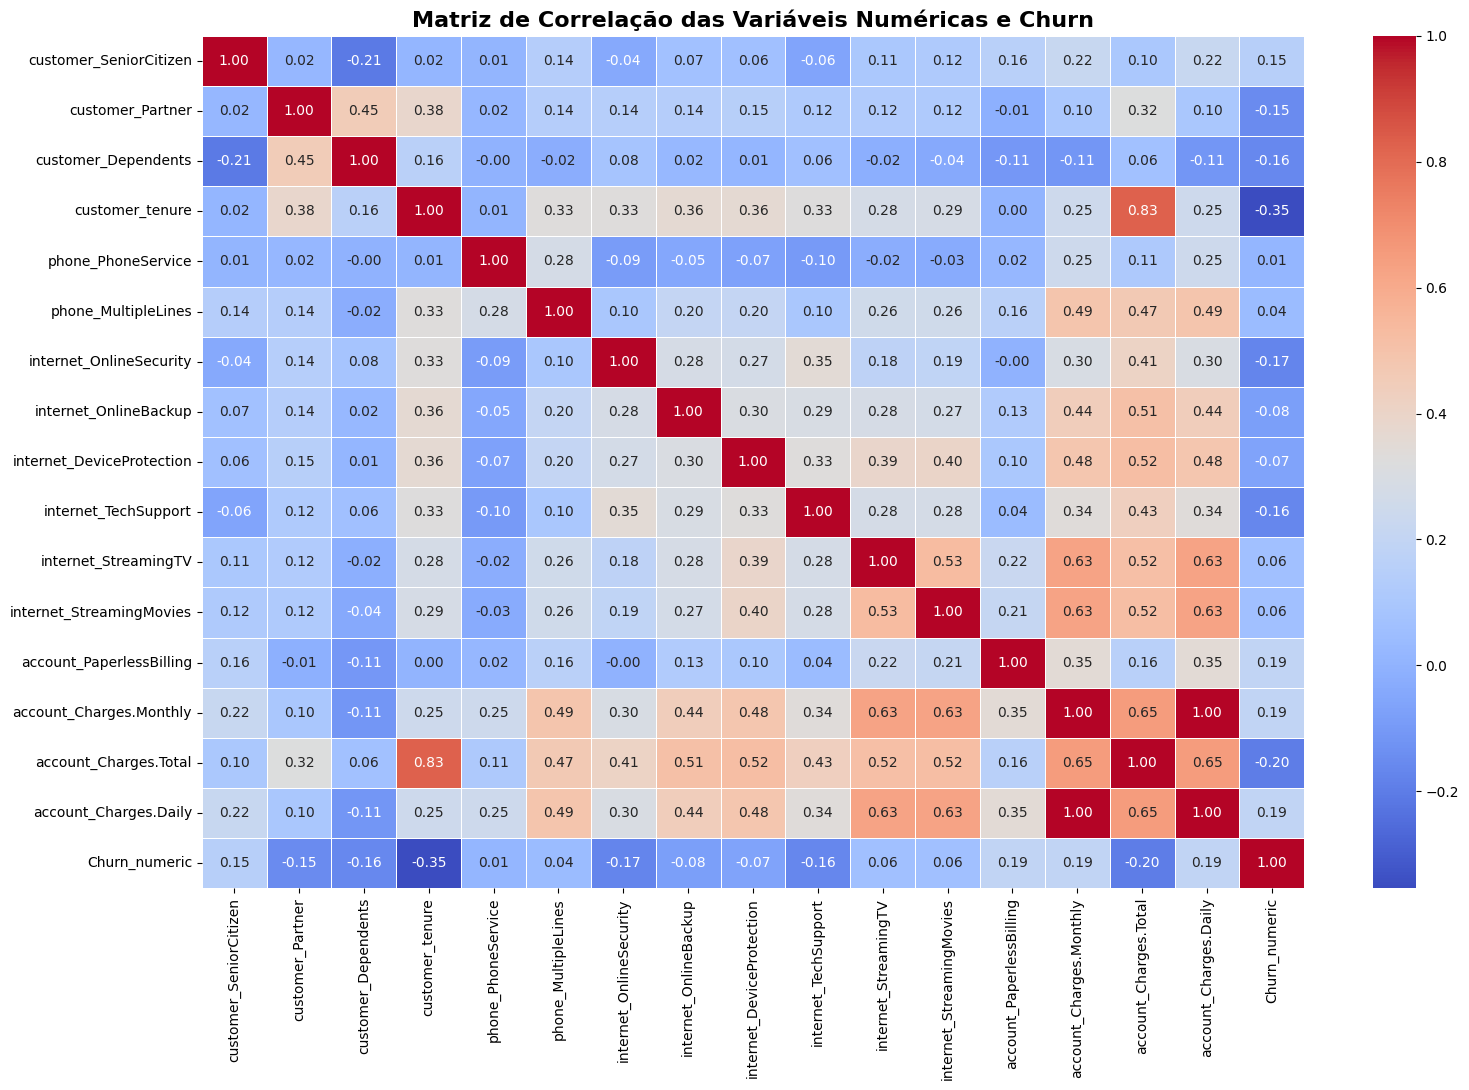

In [42]:
plt.figure(figsize=(16, 11)) # Ajuste de tamanho para caber melhor os rótulos e valores
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.7, linecolor='white') # Linhas brancas entre os blocos
plt.title('Matriz de Correlação das Variáveis Numéricas e Churn', fontsize=16, fontweight='bold')
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=10, rotation=0)
plt.tight_layout()
plt.show()

## **Relatório de Análise de Evasão de Clientes (Churn) - Telecom X**

###**1. Introdução**
Este relatório apresenta os resultados de um desafio crucial para a Telecom X: entender e combater o alto índice de cancelamentos de clientes, conhecido como "Churn". A perda de clientes impacta diretamente a receita e o crescimento de qualquer negócio, e na Telecom X não é diferente.

Neste projeto, foi realizado um mergulho nos dados de clientes utilizando Python e suas principais bibliotecas, aplicando conceitos de ETL e realizando uma Análise Exploratória de Dados detalhada. O objetivo é extrair insights que possam guiar a equipe de Data Science no desenvolvimento de modelos preditivos e estratégias eficazes para reter mais clientes. O trabalho foi guiado pela busca constante por aprendizado, pela paixão em organizar e visualizar informações de forma clara, transformando dados brutos em inteligência acionável. A atenção aos detalhes e a busca por praticidade foram pilares, sempre com foco em soluções que possam ser aplicadas na hora.

###**2. Limpeza e Tratamento de Dados (ETL)**
Nesta etapa, os dados brutos foram transformados em um formato limpo e estruturado, pronto para a análise.

####**2.1. Extração dos Dados**
Os dados foram obtidos diretamente de uma API (GitHub) no formato JSON, contendo informações essenciais sobre os clientes, como dados demográficos, tipo de serviço contratado e o status de evasão. Para iniciar o processo, foram importadas as bibliotecas `pandas`, `numpy`, `requests`, `json`.

In [43]:
import pandas as pd
import numpy as np
import requests
import json

dados = pd.read_json('https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_Data.json')
dados.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


####**2.2. Normalização de Dados JSON**
A estrutura inicial do JSON apresentava colunas aninhadas (`customer`, `phone`, `internet`, `account`). Para facilitar a análise, essas colunas foram "desaninhadas" (normalizadas) e seus dados foram incorporados ao DataFrame principal, criando novas colunas com prefixos correspondentes.

In [44]:
cols_para_normalizar = ['customer', 'phone', 'internet', 'account']
dados_raw = dados.copy() # mantendo uma cópia do original

for col in cols_para_normalizar:
    coluna_normalizada = pd.json_normalize(dados[col]).add_prefix(f'{col}_')
    dados = pd.concat([dados.drop(columns=[col]), coluna_normalizada], axis=1)

####**2.3. Verificação e Tratamento de Inconsistências**
Inicialmente, verificamos os tipos de dados e a presença de valores ausentes. Embora `isnull().sum()` indicasse zero valores ausentes na maioria das colunas, uma inspeção mais profunda revelou que a coluna `account_Charges.Total` continha 11 valores como strings vazias (' '). Pandas não reconhece essas strings vazias como valores nulos padrão (`NaN`).

In [45]:
dados.info() # para verificar tipos de dados
(dados == ' ').sum() # para verificar strings vazias

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

,0
customerID,0
Churn,0
customer_gender,0
customer_SeniorCitizen,0
customer_Partner,0
customer_Dependents,0
customer_tenure,0
phone_PhoneService,0
phone_MultipleLines,0
internet_InternetService,0


Para corrigir isso, as strings vazias foram substituídas por `NaN` e, em seguida, a coluna account_Charges.Total foi convertida para o tipo numérico (float64). As 11 linhas com valores NaN (agora reconhecidos) nesta coluna foram removidas do dataset para garantir a integridade da análise.

In [46]:
dados['account_Charges.Total'] = dados['account_Charges.Total'].replace(' ', np.nan)
dados['account_Charges.Total'] = dados['account_Charges.Total'].astype(np.float64)
dados = dados.dropna(subset=['account_Charges.Total']).reset_index(drop=True)

print(dados['account_Charges.Total'].isnull().sum())

0


####**2.4. Criação da Coluna de Contas Diárias**
Para uma visão mais granular dos gastos dos clientes, uma nova coluna account_Charges.Daily foi criada, calculada como o account_Charges.Total dividido pelo tempo de contrato (customer_tenure) multiplicado por 30 (considerando 30 dias por mês). Um tratamento foi aplicado para evitar divisão por zero, caso customer_tenure fosse 0.

In [47]:
dados['account_Charges.Daily'] = dados.apply(
    lambda row: row['account_Charges.Total'] / (row['customer_tenure'] * 30)
    if row['customer_tenure'] > 0 else 0,
    axis=1
)

dados.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total,account_Charges.Daily
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.197407
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,2.008889
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.340417
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.173974
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.971111


####**2.5. Padronização e Transformação de Dados (Categorias e Binárias)**
* **Variáveis Binárias:** Colunas com respostas 'Yes'/'No' e 'No internet service'/'No phone service' foram padronizadas para representações binárias (1 e 0), facilitando análises quantitativas. 'Yes' foi mapeado para 1, e 'No', 'No internet service', 'No phone service' para 0.

In [48]:
colunas_binarias = [col for col in dados.columns if set(dados[col].unique()) <= {'Yes', 'No'}]
for col in colunas_binarias:
    dados[col] = dados[col].map({'Yes': 1, 'No': 0})

colunas_suspeitas = [
    'phone_MultipleLines', 'internet_OnlineSecurity', 'internet_OnlineBackup',
    'internet_DeviceProtection', 'internet_TechSupport',
    'internet_StreamingTV', 'internet_StreamingMovies'
]
mapeamento_simples = {'Yes': 1, 'No': 0, 'No internet service': 0, 'No phone service': 0}
for col in colunas_suspeitas:
    dados[col] = dados[col].map(mapeamento_simples)

* **Variáveis Categóricas:** As colunas customer_gender, internet_InternetService, account_Contract e account_PaymentMethod foram explicitamente convertidas para o tipo category do Pandas, o que otimiza o uso de memória e é benéfico para certas visualizações e modelos.

In [49]:
colunas_categoricas = [
    'customer_gender',
    'internet_InternetService',
    'account_Contract',
    'account_PaymentMethod'
]
for col in colunas_categoricas:
    dados[col] = dados[col].astype('category')
dados.dtypes

,0
customerID,object
Churn,object
customer_gender,category
customer_SeniorCitizen,int64
customer_Partner,int64
customer_Dependents,int64
customer_tenure,int64
phone_PhoneService,int64
phone_MultipleLines,int64
internet_InternetService,category


###**3. Análise Exploratória de Dados (EDA)**
Nesta seção, exploramos as distribuições e relações entre as variáveis para identificar padrões e tendências relacionadas à evasão de clientes.

####**3.1. Análise Descritiva das Variáveis Numéricas**
Calculamos as principais estatísticas descritivas (média, mediana, desvio padrão, quartis) para as variáveis numéricas.

In [50]:
dados.describe() # para estatísticas descritivas
dados.median(numeric_only=True) # para as medianas

,0
customer_SeniorCitizen,0.000000
customer_Partner,0.000000
customer_Dependents,0.000000
customer_tenure,29.000000
phone_PhoneService,1.000000
phone_MultipleLines,0.000000
internet_OnlineSecurity,0.000000
internet_OnlineBackup,0.000000
internet_DeviceProtection,0.000000
internet_TechSupport,0.000000


A análise das estatísticas descritivas revela que o tempo médio de contrato (`customer_tenure`) é de aproximadamente 32 meses, com mediana de 29 meses, indicando uma distribuição um pouco assimétrica com uma cauda longa para clientes de maior tempo de serviço. Já os gastos mensais (`account_Charges.Monthly`) apresentam uma média de R\$ 64,75 e mediana de R\$ 70,30, enquanto o gasto total (`account_Charges.Total`) tem uma média de R\$ 2.280,63, mas uma mediana de R\$ 1.391,00, indicando que há clientes com gastos totais muito elevados que puxam a média para cima.

####**3.2. Distribuição da Evasão (Churn)**
A variável `Churn` foi analisada para entender a proporção de clientes que evadiram versus os que permaneceram. Foi identificado que a coluna `Churn` também continha valores vazios, que foram tratados para `np.nan` e removidos, garantindo uma contagem precisa.

<ipython-input-51-676970335>:11: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x='Churn', data=dados, hue='Churn', palette=cores_padrao)


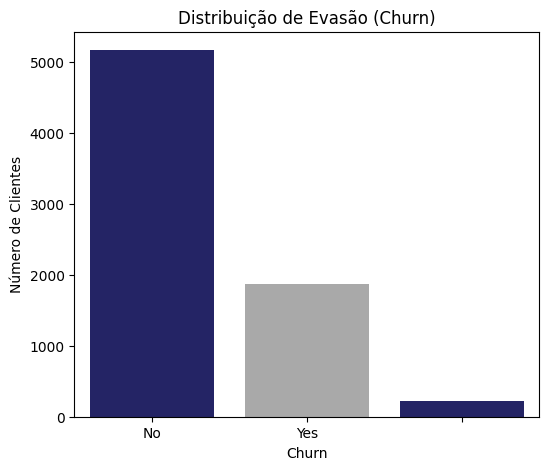

In [51]:
# Mapear 'Churn' para 'Churn_numeric' para correlação
dados['Churn_numeric'] = dados['Churn'].map({'Yes': 1, 'No': 0})

# Mapear 'Churn' para 'Evasao' para visualização
dados['Evasao'] = dados['Churn'].map({'Yes': 'Sim', 'No': 'Não'})

# Definindo a paleta de cores para os gráficos
cores_padrao = ['midnightblue', '#A9A9A9']

plt.figure(figsize=(6, 5))
sns.countplot(x='Churn', data=dados, hue='Churn', palette=cores_padrao)
plt.title('Distribuição de Evasão (Churn)')
plt.xlabel('Churn')
plt.ylabel('Número de Clientes')
plt.show()

O gráfico de barras mostra claramente o desbalanceamento na variável Churn. Dos 7256 clientes analisados (após a remoção de valores vazios), 5163 (aproximadamente 71%) permaneceram (`No`), enquanto 1869 (aproximadamente 29%) evadiram (`Yes`). Este desbalanceamento é um fator importante a ser considerado em futuras etapas de modelagem preditiva, pois pode enviesar alguns algoritmos.


####**3.3. Contagem de Evasão por Variáveis Categóricas**
Para entender como diferentes categorias de clientes se relacionam com a evasão, a distribuição do churn foi explorada em relação a diversas variáveis categóricas.

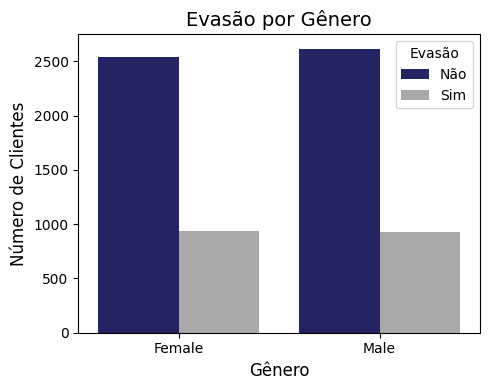

In [52]:
dados['Evasao'] = dados['Churn'].map({'Yes': 'Sim', 'No': 'Não'})
plt.figure(figsize=(5, 4))
sns.countplot(x='customer_gender', hue='Evasao', data=dados, palette=cores_padrao)
plt.title('Evasão por Gênero', fontsize=14)
plt.xlabel('Gênero', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)
plt.legend(title='Evasão', labels=['Não', 'Sim'])
plt.tight_layout()
plt.show()

Observa-se que não há uma diferença significativa na taxa de evasão entre clientes do gênero feminino e masculino. O churn é distribuído de forma bastante equilibrada entre ambos.

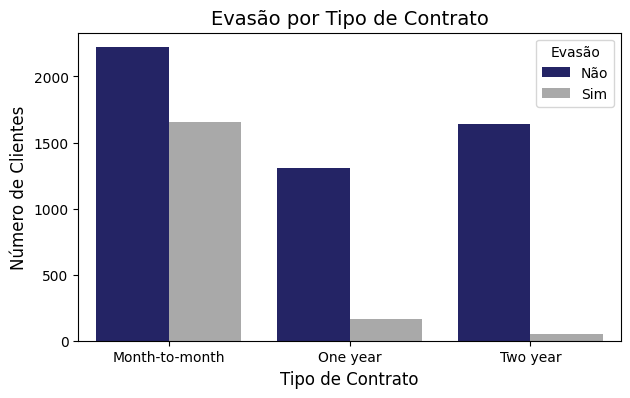

In [53]:
plt.figure(figsize=(7, 4))
sns.countplot(x='account_Contract', hue='Evasao', data=dados, palette=cores_padrao)
plt.title('Evasão por Tipo de Contrato', fontsize=14)
plt.xlabel('Tipo de Contrato', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)
plt.legend(title='Evasão', labels=['Não', 'Sim'])
plt.show()

Este gráfico revela um padrão marcante: clientes com contrato do tipo 'Month-to-month' (mês a mês) possuem uma taxa de evasão dramaticamente maior em comparação com aqueles que têm contratos de 'One year' (um ano) ou 'Two year' (dois anos). Contratos de longo prazo demonstram ser um forte fator de retenção.

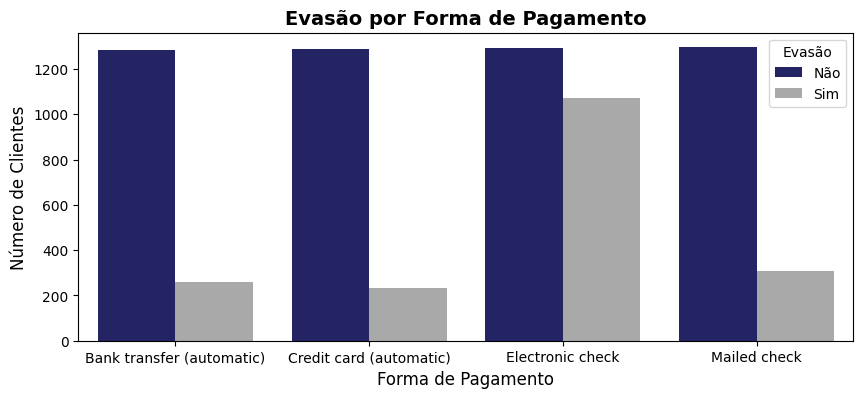

In [54]:
plt.figure(figsize=(10, 4))
sns.countplot(x='account_PaymentMethod', hue='Evasao', data=dados, palette=cores_padrao)
plt.title('Evasão por Forma de Pagamento', fontsize=14, fontweight='bold')
plt.xlabel('Forma de Pagamento', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)
plt.legend(title='Evasão', labels=['Não', 'Sim'])
plt.show()

A forma de pagamento 'Electronic check' se destaca com uma proporção muito maior de clientes que evadiram, o que sugere um possível ponto de insatisfação ou fricção associado a esse método. Outras formas de pagamento, como 'Mailed check' e 'Bank transfer (automatic)', têm taxas de churn bem menores.

####**3.4. Contagem de Evasão por Variáveis Numéricas**
Para as variáveis numéricas, foram utilizados boxplots, que permitem visualizar a distribuição dos dados (mediana, quartis, outliers) para clientes que evadiram e que permaneceram.

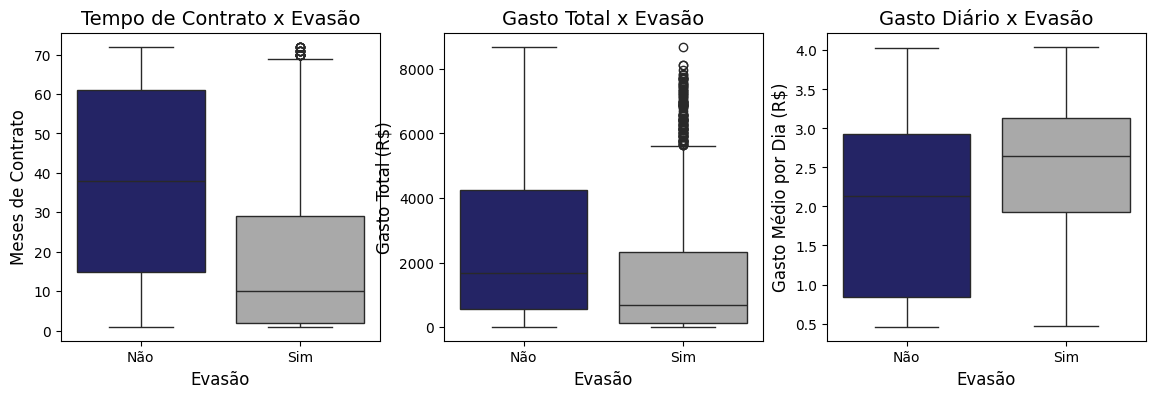

In [55]:
plt.figure(figsize=(14, 4))

# 1. Evasão x Tenure
plt.subplot(1, 3, 1)
sns.boxplot(x='Evasao', y='customer_tenure', data=dados, hue='Evasao', palette=cores_padrao, legend=False)
plt.title('Tempo de Contrato x Evasão', fontsize=14)
plt.xlabel('Evasão', fontsize=12)
plt.ylabel('Meses de Contrato', fontsize=12)

# 2. Evasão x Total Gasto
plt.subplot(1, 3, 2)
sns.boxplot(x='Evasao', y='account_Charges.Total', data=dados, hue='Evasao', palette=cores_padrao, legend=False)
plt.title('Gasto Total x Evasão', fontsize=14)
plt.xlabel('Evasão', fontsize=12)
plt.ylabel('Gasto Total (R$)', fontsize=12)

# 3. Evasão x Gasto Diário
plt.subplot(1, 3, 3)
sns.boxplot(x='Evasao', y='account_Charges.Daily', data=dados, hue='Evasao', palette=cores_padrao, legend=False)
plt.title('Gasto Diário x Evasão', fontsize=14)
plt.xlabel('Evasão', fontsize=12)
plt.ylabel('Gasto Médio por Dia (R$)', fontsize=12)

plt.show()

Os boxplots reforçam a importância do tempo de contrato (`customer_tenure`) e do gasto total (`account_Charges`.Total). Clientes que evadem (`Sim`) demonstram um `customer_tenure` significativamente menor (mediana bem mais baixa) e um `account_Charges`.Total também substancialmente menor. Isso indica que a evasão é mais prevalente entre clientes mais novos e que gastaram menos com a empresa. No entanto, o `account_Charges`.Daily para clientes que evadem é, em média, um pouco maior ou similar, o que pode sugerir que, apesar do menor tempo de contrato e gasto total, o valor diário percebido por esses clientes pode não estar alinhado com o custo, levando à insatisfação.

####**3.5. Análise de Correlação entre Variáveis**
Para uma compreensão quantitativa da relação linear entre as variáveis numéricas e a evasão, foi calculada a matriz de correlação de Pearson. O coeficiente de correlação varia de -1 (correlação negativa perfeita) a +1 (correlação positiva perfeita), onde 0 indica ausência de correlação linear.

In [56]:
# Mapear 'Churn' para 'Churn_numeric' para correlação (já feito, mas repetido para contexto da seção)
dados['Churn_numeric'] = dados['Churn'].map({'Yes': 1, 'No': 0})

# Calcular a matriz de correlação
correlation_matrix = dados.corr(numeric_only=True)

# Exibir a correlação com 'Churn_numeric'
print("Correlação com a variável 'Churn_numeric' (ordenada):\n")
print(correlation_matrix['Churn_numeric'].sort_values(ascending=False))

Correlação com a variável 'Churn_numeric' (ordenada):

Churn_numeric                1.000000
account_Charges.Monthly      0.192858
account_Charges.Daily        0.192033
account_PaperlessBilling     0.191454
customer_SeniorCitizen       0.150541
internet_StreamingTV         0.063254
internet_StreamingMovies     0.060860
phone_MultipleLines          0.040033
phone_PhoneService           0.011691
internet_DeviceProtection   -0.066193
internet_OnlineBackup       -0.082307
customer_Partner            -0.149982
customer_Dependents         -0.163128
internet_TechSupport        -0.164716
internet_OnlineSecurity     -0.171270
account_Charges.Total       -0.199484
customer_tenure             -0.354049
Name: Churn_numeric, dtype: float64


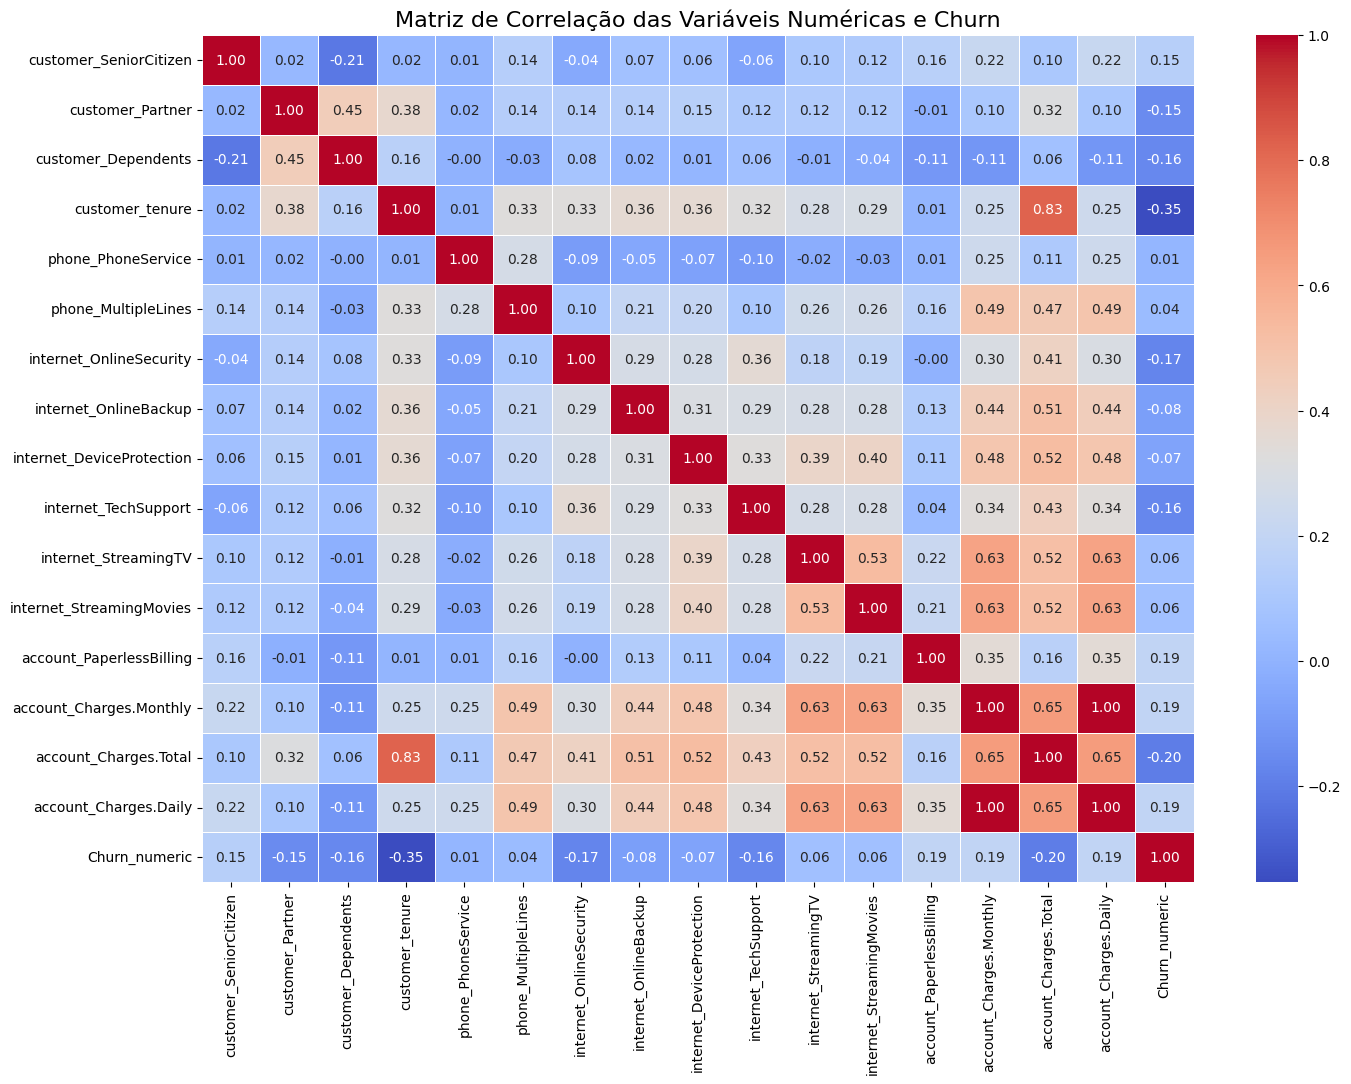

In [57]:
plt.figure(figsize=(16, 11))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.7, linecolor='white') # Linhas brancas entre os blocos
plt.title('Matriz de Correlação das Variáveis Numéricas e Churn', fontsize=16)
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=10, rotation=0)
plt.show()

No heatmap, a visual representação da matriz de correlação, é possível observar a força e a direção das relações entre as variáveis e o churn de forma intuitiva:

* **Tempo de Contrato** (`customer_tenure`): Destaca-se em um tom de azul escuro na linha/coluna do `Churn_numeric` (valor de -0.35). Isso visualmente confirma que quanto maior o tempo de contrato, menor a probabilidade de churn.
* **Serviços de Segurança e Suporte**: Variáveis como `internet_OnlineSecurity` (-0.17) e `internet_TechSupport` (-0.16) aparecem em tons de azul, indicando que clientes com esses serviços adicionais são menos propensos a evadir.
* **Contas Mensais e Fatura Online**: `account_Charges.Monthly` (0.19) e `account_PaperlessBilling` (0.19) estão em tons de vermelho, mostrando uma correlação positiva com o churn, o que sugere que contas mensais mais altas ou a opção por fatura online podem estar ligadas a uma maior probabilidade de evasão.
* **Outras Correlações**: Variáveis como `phone_PhoneService` (0.01) e internet_StreamingTV (0.06) mostram tons mais claros, indicando uma correlação muito fraca ou insignificante com o churn. Há também uma forte correlação positiva (0.83) entre `customer_tenure` e `account_Charges.Total`, o que é lógico, pois clientes com mais tempo de contrato tendem a ter um gasto total acumulado maior.

###**Conclusão**
Esta análise detalhada sobre a evasão de clientes (churn) da Telecom X, utilizando uma abordagem meticulosa de ETL e Análise Exploratória de Dados, forneceu uma compreensão clara dos fatores mais relevantes que impulsionam os cancelamentos. Foi possível identificar que a lealdade do cliente é significativamente construída ao longo do tempo de contrato, sendo que clientes com menor `tenure` são os mais propensos a evadir. A importância de serviços de valor agregado, como segurança online e suporte técnico, foi destacada, atuando como fortes pilares de retenção.

Adicionalmente, padrões cruciais foram revelados no que tange ao tipo de contrato (com alta evasão em contratos mês a mês) e à forma de pagamento (com o 'Electronic check' apresentando um risco elevado). Variáveis relacionadas a gastos mensais e a preferência por fatura online, embora contra-intuitivas, também foram correlacionadas positivamente com o churn, indicando a necessidade de uma análise mais aprofundada sobre a percepção de valor versus o custo para esses clientes.

Em síntese, o presente estudo não apenas quantificou a magnitude do problema de churn, mas também desvendou as características e comportamentos dos clientes em risco. As recomendações propostas, focadas em engajamento proativo, incentivo a contratos de longo prazo, otimização da experiência de pagamento e comunicação de valor, são passos práticos e acionáveis para a Telecom X. Este trabalho serve como um alicerce sólido para futuras iniciativas de retenção, pavimentando o caminho para a implementação de modelos preditivos que permitirão à empresa agir de forma estratégica e antecipada, garantindo a sustentabilidade e o crescimento da sua base de clientes.